In [1]:
import tensorflow as tf
import keras
import numpy as np

In [2]:
from tensorflow.keras.datasets import boston_housing
(train_data,train_labels),(test_data,test_labels) = boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [5]:
# Z score normalization done on the training data for scaling 
mean = train_data.mean()
std = train_data.std()
train_data -= mean
test_data -= mean
train_data /= std
test_data /= std

In [6]:
# Validation data build

X_train = train_data[75:]
X_valid = train_data[:75]
y_train = train_data[75:]
y_valid = train_data[:75]

In [7]:
# Model build
from keras import Sequential
from keras import layers
from keras.layers import Dense

In [8]:
model = Sequential([
    Dense(units=64, activation="relu"),
    Dense(units=64, activation="relu"),
    Dense(units=1)
])

In [9]:
model.compile(loss="mse",optimizer="rmsprop",metrics=["mae"])

In [10]:
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))
history

Epoch 1/20
11/11 [==============================] - 1s 17ms/step - loss: 0.9890 - mae: 0.6806 - val_loss: 1.0407 - val_mae: 0.6775
Epoch 2/20
11/11 [==============================] - 0s 6ms/step - loss: 0.9846 - mae: 0.6760 - val_loss: 1.0407 - val_mae: 0.6901
Epoch 3/20
11/11 [==============================] - 0s 6ms/step - loss: 0.9840 - mae: 0.6749 - val_loss: 1.0441 - val_mae: 0.6513
Epoch 4/20
11/11 [==============================] - 0s 6ms/step - loss: 0.9835 - mae: 0.6748 - val_loss: 1.0432 - val_mae: 0.7140
Epoch 5/20
11/11 [==============================] - 0s 6ms/step - loss: 0.9821 - mae: 0.6778 - val_loss: 1.0484 - val_mae: 0.7350
Epoch 6/20
11/11 [==============================] - 0s 6ms/step - loss: 0.9837 - mae: 0.6779 - val_loss: 1.0406 - val_mae: 0.6684
Epoch 7/20
11/11 [==============================] - 0s 6ms/step - loss: 0.9837 - mae: 0.6754 - val_loss: 1.0403 - val_mae: 0.6913
Epoch 8/20
11/11 [==============================] - 0s 6ms/step - loss: 0.9839 - mae: 0.6

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

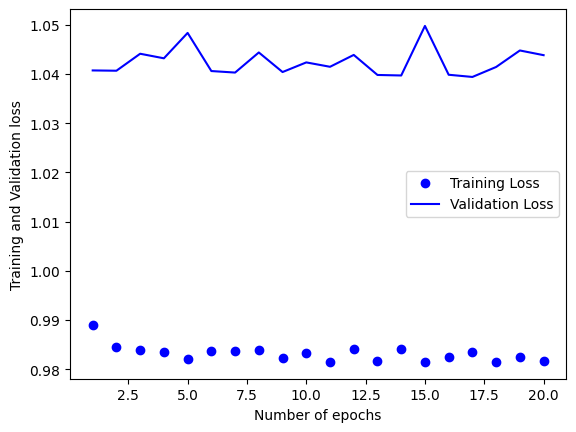

In [12]:
import matplotlib.pyplot as plt

epochs = range(1,len(history_dict["loss"])+1)

plt.plot(epochs,history_dict["loss"],"bo",label="Training Loss")
plt.plot(epochs,history_dict["val_loss"],"b",label="Validation Loss")
plt.legend()
plt.xlabel("Number of epochs")
plt.ylabel("Training and Validation loss")

plt.show()

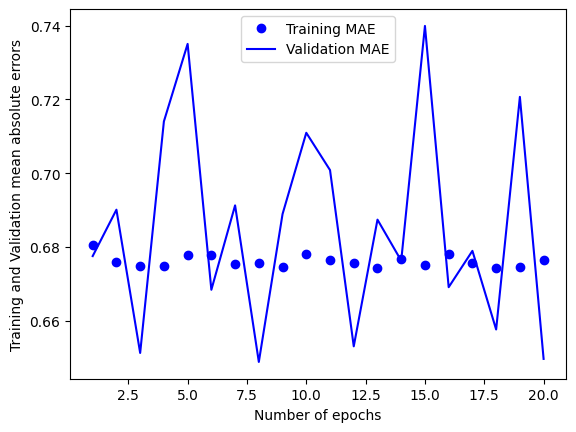

In [13]:
import matplotlib.pyplot as plt

epochs = range(1,len(history_dict["loss"])+1)

plt.plot(epochs,history_dict["mae"],"bo",label="Training MAE")
plt.plot(epochs,history_dict["val_mae"],"b",label="Validation MAE")
plt.legend()
plt.xlabel("Number of epochs")
plt.ylabel("Training and Validation mean absolute errors")

plt.show()

In [14]:
# Validation data is changing a lot because we have very less samples of data present in the validation data, hence we need to follow K cross validation

In [15]:
#Buildin the same model again
model1 = Sequential([
    Dense(units=64, activation="relu"),
    Dense(units=64, activation="relu"),
    Dense(units=1)
])

In [16]:
class K_fold_cross_validation:
    def __init__(self,X,y,k):
        self.X = X
        self.y = y
        self.k = k
    
    def calculate(self,num_epochs):
        fold_scores = []
        model1.compile(loss="mean_squared_error",optimizer="rmsprop",metrics=["mae"])
        num_of_validation_samples = int(len(self.X) / self.k)
        for i in range(self.k):
            X_valid = self.X[i*num_of_validation_samples:(i+1)*num_of_validation_samples]
            y_valid = self.y[i*num_of_validation_samples:(i+1)*num_of_validation_samples]

            X_train = np.concatenate([self.X[:i*num_of_validation_samples],self.X[(i+1)*num_of_validation_samples:]],axis=0)
            y_train = np.concatenate([self.y[:i*num_of_validation_samples],self.y[(i+1)*num_of_validation_samples:]],axis=0)

            history = model1.fit(X_train,y_train,epochs=num_epochs,batch_size=16,verbose=0,
                       validation_data=(X_valid,y_valid)) # Verbose = 0 so that our model trains silently
            
            val_mae = history.history["val_mae"]

            fold_scores.append(val_mae)
        
        return fold_scores


In [17]:
Fold_scores = K_fold_cross_validation(train_data,train_labels,k=4).calculate(num_epochs=130)

In [18]:
Fold_scores

[[17.917388916015625,
  13.030960083007812,
  9.440591812133789,
  8.429803848266602,
  8.248068809509277,
  7.639060020446777,
  7.369552135467529,
  7.038017749786377,
  6.827509880065918,
  6.439149379730225,
  6.80714750289917,
  6.462010383605957,
  6.031675338745117,
  6.573128700256348,
  6.073360443115234,
  6.144773483276367,
  6.196278095245361,
  6.069087028503418,
  6.182119369506836,
  6.093332290649414,
  5.8884992599487305,
  6.108790397644043,
  6.180419921875,
  6.043572902679443,
  5.828405857086182,
  5.738275051116943,
  5.990584850311279,
  5.659048080444336,
  5.968668460845947,
  5.79353666305542,
  5.742793083190918,
  6.107432842254639,
  5.609327793121338,
  5.4663496017456055,
  5.720582962036133,
  5.61151647567749,
  6.074095249176025,
  5.541406631469727,
  5.586104393005371,
  5.8366875648498535,
  5.914938926696777,
  5.9102396965026855,
  5.798061370849609,
  5.842925548553467,
  5.532454013824463,
  5.612008094787598,
  5.688051223754883,
  6.395512580